Install

In [ ]:
!pip install sklearn_crfsuite
!pip install emoji
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
!unzip master.zip
!mkdir wisesight_data; ls
!cd wisesight-sentiment-master/kaggle-competition; ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.6 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=725800e59477a6c2d0d0ce1e7da05ee64f5b22af2940fb9dcb05b8f1005069a5
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 11.7 MB 118 kB/s
  Created wheel for pythainlp: filename=pythainlp-3.1.0.dev1-py3-none-any.whl size=11519146 sha256=b787349acf9416e490e8f2ae63dfbd6438b95a604738c5a1fecbbacb1c5ed1dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-aurir7_3/wheels/87/69/e8/234fe11c5f2ec389a780229b2a1619e17b8ad38cd45ea

In [ ]:
#snippet to install thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

--2022-09-03 12:08:42--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2022-09-03 12:08:43--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2022-09-03 12:08:43 (6.15 MB/s) - ‘t

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


  0%|          | 0/1050919089 [00:00<?, ?it/s]

Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


  0%|          | 0/1530484 [00:00<?, ?it/s]

In [ ]:
from pythainlp.ulmfit import *
process_thai("น้องเจนเปิดโลก")

['น้อง', 'เจน', 'เปิดโลก']

## Process Text Files to CSVs

In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/train.txt") as f:
    texts = [line.strip() for line in f.readlines()]

with open("wisesight-sentiment-master/kaggle-competition/train_label.txt") as f:
    categories = [line.strip() for line in f.readlines()]

all_df = pd.DataFrame({"category":categories, "texts":texts})
all_df.to_csv('all_df.csv',index=False)
all_df.shape

(24063, 2)

In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/test.txt") as f:
    texts = [line.strip() for line in f.readlines()]

cat_test = pd.read_csv("wisesight-sentiment-master/kaggle-competition/test_majority.csv")

test_df = pd.DataFrame({"category":cat_test["Class"], "texts":texts})
test_df.shape

(2674, 2)

## Load Data

In [ ]:
all_df["processed"] = all_df.texts.map(lambda x: "|".join(process_thai(x)))
all_df["wc"] = all_df.processed.map(lambda x: len(x.split("|")))
all_df["uwc"] = all_df.processed.map(lambda x: len(set(x.split("|"))))

test_df["processed"] = test_df.texts.map(lambda x: "|".join(process_thai(x)))
test_df["wc"] = test_df.processed.map(lambda x: len(x.split("|")))
test_df["uwc"] = test_df.processed.map(lambda x: len(set(x.split("|"))))

### Create test set

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('เมื่อวานเป็นไงบ้างงงง (การตอบกลับ)').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame(rows)
df.drop(df.index[0:1], inplace=True)
df.columns = ["ประทับเวลา", "เล่าให้ฟังหน่อย", "ประสบการณ์ที่ดีที่อยากเล่า", "เรื่องที่อยากระบาย", "catergory"]
df.index -= 1
df

[['ประทับเวลา', 'เล่าให้ฟังหน่อย', 'ประสบการณ์ที่ดีที่อยากเล่า', 'เรื่องที่อยากระบาย', 'catergory'], ['20/8/2022, 14:42:33', 'เมื่อวานก็เฉยๆ ไม่ได้มีอะไรมาก', '', '', 'neu'], ['20/8/2022, 14:47:32', 'ก็โอเคนะ', 'มีเด็กกลับบ้านคนนึง รู้สึกดีที่เค้านอนอยู่ในบ้าน', 'เพลียกะเด็กอีกคนที่ไม่สนใจเรียน น้ำมันราคาแพง ลูกค้างี่เง่า', 'neu'], ['20/8/2022, 14:48:12', 'เมื่อวานผ่านไปอย่างเรียบๆแต่รู้สึกว่าชีวิตได้พัฒนาขึ้นละมั้ง', 'เหมือนในห้องมีกลุ่มที่มาดิสคัสหัวข้อการเรียนกับเรา พอได้แบ่งปันเนื้อหาและความกังวลในวิชากับเพื่อนก็สบายใจขึ้น', '', 'neu'], ['20/8/2022, 14:48:28', 'Happyดี ได้อยู่กับสิ่งที่ชอบทั้งวัน มีเรื่องให้เครียดบ้างเป็นปกติ', 'ได้อยู่กับเพื่อน ทำอะไรโง่ๆ', '', 'pos'], ['20/8/2022, 14:49:51', 'เมื่อวานมีความสุขดีไปเรียน แล้วก็กลับมานอนดูหนังที่บ้าน ตอนเย็นได้ออกไปกินข้าวกับเพื่อนๆ', 'ได้ไปกินข้าวกับเพื่อน ได้เจอเพื่อนที่ไม่ได้เจอกันนาน ได้กินข้าวพร้อมกับเพื่อนๆในรอบหลายเดือน', '', 'pos'], ['20/8/2022, 14:49:55', 'รู้สึกดีมากๆ เป็นปีที่สุดท้ายที่ได้ลงแข่งประกวดชุดรีไซเคิล ปีนี้เป็น

,ประทับเวลา,เล่าให้ฟังหน่อย,ประสบการณ์ที่ดีที่อยากเล่า,เรื่องที่อยากระบาย,catergory
0,"20/8/2022, 14:42:33",เมื่อวานก็เฉยๆ ไม่ได้มีอะไรมาก,,,neu
1,"20/8/2022, 14:47:32",ก็โอเคนะ,มีเด็กกลับบ้านคนนึง รู้สึกดีที่เค้านอนอยู่ในบ้าน,เพลียกะเด็กอีกคนที่ไม่สนใจเรียน น้ำมันราคาแพง ...,neu
2,"20/8/2022, 14:48:12",เมื่อวานผ่านไปอย่างเรียบๆแต่รู้สึกว่าชีวิตได้พ...,เหมือนในห้องมีกลุ่มที่มาดิสคัสหัวข้อการเรียนกั...,,neu
3,"20/8/2022, 14:48:28",Happyดี ได้อยู่กับสิ่งที่ชอบทั้งวัน มีเรื่องให...,ได้อยู่กับเพื่อน ทำอะไรโง่ๆ,,pos
4,"20/8/2022, 14:49:51",เมื่อวานมีความสุขดีไปเรียน แล้วก็กลับมานอนดูหน...,ได้ไปกินข้าวกับเพื่อน ได้เจอเพื่อนที่ไม่ได้เจอ...,,pos
...,...,...,...,...,...
106,"21/8/2022, 11:11:42",เมื่อวาน เช้าไปประชุม แล้วเข้าทำงาน ปกติแล้ว ว...,ในบางครั้งที่เราประสบปัญหา ก็จะมีสิ่งดีๆ มาให้...,เมื่อทำงานมากๆ ความผิดพลาดย่อมเกิดขึ้น จงอย่าน...,pos
107,"21/8/2022, 11:47:38",เมื่อวานไปอิมเเพค ได้ไปเดินกับเทอด้วย นานทีจะม...,ได้คุยแลกเปลี่ยนกันมากขึ้น,,pos
108,"21/8/2022, 19:56:23",อยากเข้ากายภาพบำบัดจุฬาแต่ยังไม่ได้เตรียมตัวเล...,เล่นleague of legendsแล้วขึ้นgoldได้,ความบัดซบของการเรียนกับบุญทรัพย์ ยังไม่รู้เลยว...,neg
109,"21/8/2022, 20:28:29",อารมณ์ดี,การลงทุนมีความเสี่ยง แต่ถ้าไม่ลงทุนจะเสี่ยงกว่า,คนเราไปบังคับใจใครไม่ได้ นอกจากใจตนเอง,pos


In [ ]:
test_ = pd.DataFrame({"category": df["catergory"], "texts":df["เล่าให้ฟังหน่อย"]})

In [ ]:
test_

,category,texts
0,neu,เมื่อวานก็เฉยๆ ไม่ได้มีอะไรมาก
1,neu,ก็โอเคนะ
2,neu,เมื่อวานผ่านไปอย่างเรียบๆแต่รู้สึกว่าชีวิตได้พ...
3,pos,Happyดี ได้อยู่กับสิ่งที่ชอบทั้งวัน มีเรื่องให...
4,pos,เมื่อวานมีความสุขดีไปเรียน แล้วก็กลับมานอนดูหน...
...,...,...
106,pos,เมื่อวาน เช้าไปประชุม แล้วเข้าทำงาน ปกติแล้ว ว...
107,pos,เมื่อวานไปอิมเเพค ได้ไปเดินกับเทอด้วย นานทีจะม...
108,neg,อยากเข้ากายภาพบำบัดจุฬาแต่ยังไม่ได้เตรียมตัวเล...
109,pos,อารมณ์ดี


In [ ]:
test_.shape

(111, 2)

In [ ]:
test_["category"].unique()

array(['neu', 'pos', 'neg'], dtype=object)

In [ ]:
test_["processed"] = test_.texts.map(lambda x: "|".join(process_thai(x)))
test_["wc"] = test_.processed.map(lambda x: len(x.split("|")))
test_["uwc"] = test_.processed.map(lambda x: len(set(x.split("|"))))

In [ ]:
test_.shape

(111, 5)

In [ ]:
all_df.shape

(24063, 5)

In [ ]:
all_df = pd.concat([all_df, test_])

In [ ]:
all_df.shape

(24174, 5)

In [ ]:
print(all_df["category"].unique())

['neu' 'neg' 'pos' 'q']


In [ ]:
print(all_df["category"].value_counts() / all_df.shape[0])

neu    0.543518
neg    0.255481
pos    0.179573
q      0.021428
Name: category, dtype: float64


In [ ]:
#when finding hyperparameters
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

# #when actually doing it
# train_df = all_df.copy()
# valid_df = pd.read_csv('valid_df.csv')

In [ ]:
valid_df.head()

,category,texts,processed,wc,uwc
0,neu,4คนครบ,4|คน|ครบ,3,3
1,neu,ส่วนตัวมองว่าโอนเงินจากทรูวอลเลทเข้าธนาคารแล้ว...,ส่วนตัว|มองว่า|โอน|เงิน|จาก|ท|รู|วอ|ลเลท|เข้า|...,167,102
2,neu,ความสุขแบบกลมกล่อมในคืน countdown คือ BLEND 28...,ความสุข|แบบ|กลมกล่อม|ใน|คืน|countdown|คือ|blen...,74,64
3,neu,กูขำ นึกว่าเหล้าจอนนี่วอคเกอร์ ไล่ไปตั้งแต่ เร...,กู|ขำ|นึก|ว่า|เหล้า|จอน|นี่|วอ|ค|เก|อร์|ไล่|ไป...,36,36
4,neu,สาขาที่ร่วมรายการมีดังนี้ค่ะ บิ๊กซี โคราช โลตั...,สาขา|ที่|ร่วม|รายการ|มี|ดังนี้|ค่ะ|บิ๊กซี|โครา...,33,23


In [ ]:
#prevalence
print(train_df["category"].value_counts() / train_df.shape[0])

neu    0.543875
neg    0.255074
pos    0.179783
q      0.021268
Name: category, dtype: float64


In [ ]:
#prevalence
print(valid_df["category"].value_counts() / valid_df.shape[0])

neu    0.541494
neg    0.257789
pos    0.178384
q      0.022333
Name: category, dtype: float64


In [ ]:
#prevalence
all_df.category.value_counts() / all_df.shape[0]

neu    0.543518
neg    0.255481
pos    0.179573
q      0.021428
Name: category, dtype: float64

## Train-validation Split

### Create Features

In [ ]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["category"]

In [ ]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["texts"])
text_test = tfidf_fit.transform(test_df["texts"])
text_train.shape, text_valid.shape

((20547, 4640), (3627, 4640))

In [ ]:
#word count and unique word counts; actually might not be so useful
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(all_df[["wc","uwc"]].astype(float))
print(scaler_fit.mean_, scaler_fit.var_)
num_train = scaler_fit.transform(train_df[["wc","uwc"]].astype(float))
num_valid = scaler_fit.transform(valid_df[["wc","uwc"]].astype(float))
num_test = scaler_fit.transform(test_df[["wc","uwc"]].astype(float))
num_train.shape, num_valid.shape

[21.94502358 18.19864317] [1150.1800255   509.92438634]


((20547, 2), (3627, 2))

In [ ]:
#concatenate text and word count features
X_train = np.concatenate([num_train,text_train.toarray()],axis=1)
X_valid = np.concatenate([num_valid,text_valid.toarray()],axis=1)
X_test = np.concatenate([num_test,text_test.toarray()],axis=1)
X_train.shape, X_valid.shape

((20547, 4642), (3627, 4642))

### Fit Model

In [ ]:
#fit logistic regression models
model = LogisticRegression(C=2., penalty="l2", solver="liblinear", dual=False, multi_class="ovr")
model.fit(X_train,y_train)
model.score(X_valid,y_valid)

0.7212572373862697

### See Results

In [ ]:
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df["preds"] = model.predict(X_valid)
probs_df["category"] = valid_df.category
probs_df["texts"] = valid_df.texts
probs_df["processed"] = valid_df.processed
probs_df["wc"] = valid_df.wc
probs_df["uwc"] = valid_df.uwc
probs_df["hit"] = (probs_df.preds==probs_df.category)
probs_df.to_csv("probs_df_linear.csv", index=False)

In [ ]:
probs_df.iloc[2305: 2308]

,neg,neu,pos,q,preds,category,texts,processed,wc,uwc,hit
2305,0.883434,0.063556,0.050976,0.002034,neg,neg,ไม่น่าหลงเชื่อไอพลอยเลย กินสปายละแสบท้องมาก ฮื...,ไม่น่า|หลงเชื่อ|ไอ|พลอย|เลย|กิน|สปา|ย|ละ|แสบ|ท...,14,14,True
2306,0.555684,0.411429,0.030825,0.002062,neg,neg,ลูกค้าบอกรถมีเสียงในห้องเครื่อง....ตรวจเช็คเสี...,ลูกค้า|บอก|รถ|มีเสียง|ใน|ห้องเครื่อง|.|xxrep|ต...,19,18,True
2307,0.904048,0.020194,0.071602,0.004156,neg,neg,Kulov แม่งเมาค้างมากก,kulov|แม่|ง|เมาค้าง|มา|กก,6,6,True


In [ ]:
dt = pd.DataFrame(columns=probs_df.columns)
for a in probs_df.index:
  if (probs_df.loc[a, "category"]=="neg") and (probs_df.loc[a, "preds"]=="neg"):
    dt = pd.concat([dt, probs_df.iloc[a]])

,neg,neu,pos,q,preds,category,texts,processed,wc,uwc,hit


0.7212572373862697


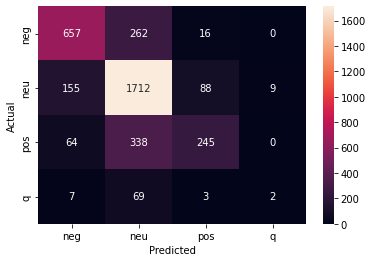

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_df.category,probs_df.preds)
print(model.score(X_valid,y_valid))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()